In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [20]:
def dbscan_alg(df, cols):
    scaler = StandardScaler()
    country_clust_scaled = scaler.fit_transform(df[cols])
    dbscan = DBSCAN(eps=0.3,min_samples=5)
    df['cluster'] = dbscan.fit_predict(country_clust_scaled)
    return df

Cluster are: [-1  0  1  2  3]
Clusters size is: [55 72 25  7  8]


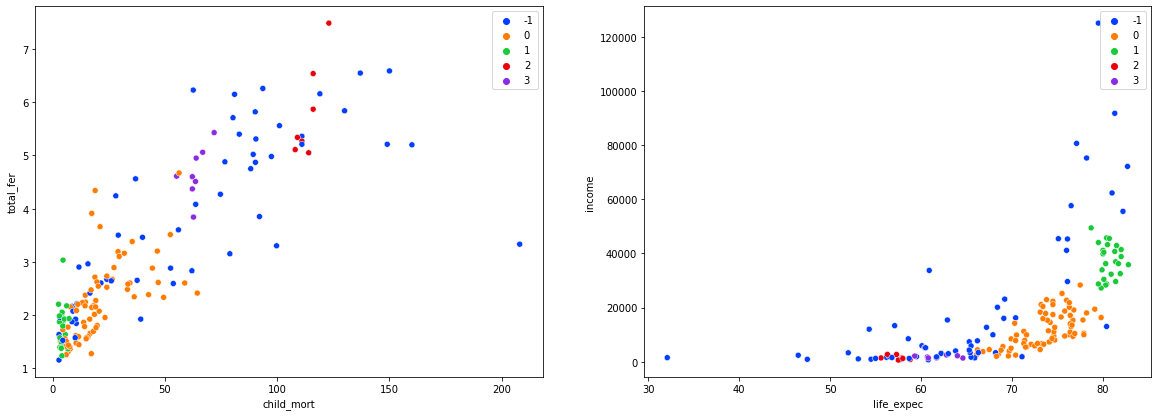

In [21]:
if __name__ == ('__main__'):
    df = pd.read_csv('Country-data.csv')
    df = dbscan_alg(df.copy(), ['child_mort', 'income', 'life_expec'])
    unique_clusters = np.unique(df['cluster'])
    print('Cluster are:', unique_clusters)
    print('Clusters size is:', np.bincount(df['cluster'] + 1))
    
    plt.figure(figsize=(20, 15))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = 'child_mort', y = 'total_fer', data = df, hue = 'cluster', palette = "bright")
    plt.legend(loc = "best")
    plt.xlabel('child_mort')
    plt.ylabel('total_fer')
    
    plt.subplot(2, 2, 2)
    sns.scatterplot(x = 'life_expec', y = 'income', data = df, hue = 'cluster', palette = "bright")
    plt.legend(loc = "best")
    plt.xlabel('life_expec')
    plt.ylabel('income')
    
    plt.show()

In [22]:
    df_data = df.query('country=="United States"|country=="Australia"|country=="China"|country=="Germany"|country=="Cameroon"')[['country', 'cluster']]
    df.drop('cluster',axis=1,inplace=True)
    print(df_data)

           country  cluster
7        Australia        1
28        Cameroon        2
34           China        0
58         Germany        1
159  United States        1
